# 1. Build a logistic model to predict the heart disease based on the dataset provided


In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100) # Show all columns when looking at dataframe

In [2]:
df = pd.read_csv("G:\PPYTHON\heart_2020_cleaned.csv")
df.head(3)

,Heart Disease,BMI,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Diff. Walking,Sex,Age Category,Race,Diabetic,Physical Activity,Gen. Health,Sleeping Time,Asthma,Kidney Disease,Skin Cancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No


In [3]:
df.isnull().any()

Heart Disease        False
BMI                  False
Smoking              False
Alcohol Drinking     False
Stroke               False
Physical Health      False
Mental Health        False
Diff. Walking        False
Sex                  False
Age Category         False
Race                 False
Diabetic             False
Physical Activity    False
Gen. Health          False
Sleeping Time        False
Asthma               False
Kidney Disease       False
Skin Cancer          False
dtype: bool

In [4]:
df.shape

(319795, 18)

In [5]:
df.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [6]:
df.dtypes

Heart Disease         object
BMI                  float64
Smoking               object
Alcohol Drinking      object
Stroke                object
Physical Health        int64
Mental Health          int64
Diff. Walking         object
Sex                   object
Age Category          object
Race                  object
Diabetic              object
Physical Activity     object
Gen. Health           object
Sleeping Time          int64
Asthma                object
Kidney Disease        object
Skin Cancer           object
dtype: object

In [7]:
col_Y_N = [column for column in df.columns if df[column].dtype == 'object']
col_Y_N

['Heart Disease',
 'Smoking',
 'Alcohol Drinking',
 'Stroke',
 'Diff. Walking',
 'Sex',
 'Age Category',
 'Race',
 'Diabetic',
 'Physical Activity',
 'Gen. Health',
 'Asthma',
 'Kidney Disease',
 'Skin Cancer']

In [8]:
col_Y_N = [column for column in col_Y_N if column not in ['Sex', 'Age Category', 'Race', 'Gen. Health'] ]
col_Y_N

['Heart Disease',
 'Smoking',
 'Alcohol Drinking',
 'Stroke',
 'Diff. Walking',
 'Diabetic',
 'Physical Activity',
 'Asthma',
 'Kidney Disease',
 'Skin Cancer']

In [9]:
# Notice that we have a few categorical variables with Yes/No values. Let us convert them to binary 1/0

df[col_Y_N] = df[col_Y_N].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
df.head()

,Heart Disease,BMI,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Diff. Walking,Sex,Age Category,Race,Diabetic,Physical Activity,Gen. Health,Sleeping Time,Asthma,Kidney Disease,Skin Cancer
0,0,16.60,1,0,0,3,30,0,Female,55-59,White,1.0,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,Female,80 or older,White,0.0,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,Male,65-69,White,1.0,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,Female,75-79,White,0.0,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,Female,40-44,White,0.0,1,Very good,8,0,0,0


In [10]:
df.info()
df_orig = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Heart Disease      319795 non-null  int64  
 1   BMI                319795 non-null  float64
 2   Smoking            319795 non-null  int64  
 3   Alcohol Drinking   319795 non-null  int64  
 4   Stroke             319795 non-null  int64  
 5   Physical Health    319795 non-null  int64  
 6   Mental Health      319795 non-null  int64  
 7   Diff. Walking      319795 non-null  int64  
 8   Sex                319795 non-null  object 
 9   Age Category       319795 non-null  object 
 10  Race               319795 non-null  object 
 11  Diabetic           310455 non-null  float64
 12  Physical Activity  319795 non-null  int64  
 13  Gen. Health        319795 non-null  object 
 14  Sleeping Time      319795 non-null  int64  
 15  Asthma             319795 non-null  int64  
 16  Ki

## We can find 4 more categorical variables which are not yes/no. The dtype is object for these 4.Let us convert them into dummy variables.

In [11]:
categoricals = df.select_dtypes(include=['object'])
categoricals.head()

,Sex,Age Category,Race,Gen. Health
0,Female,55-59,White,Very good
1,Female,80 or older,White,Very good
2,Male,65-69,White,Fair
3,Female,75-79,White,Good
4,Female,40-44,White,Very good


In [12]:
cat_dummies = pd.get_dummies(categoricals, drop_first=True)
cat_dummies.head()

,Sex_Male,Age Category_25-29,Age Category_30-34,Age Category_35-39,Age Category_40-44,Age Category_45-49,Age Category_50-54,Age Category_55-59,Age Category_60-64,Age Category_65-69,Age Category_70-74,Age Category_75-79,Age Category_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Gen. Health_Fair,Gen. Health_Good,Gen. Health_Poor,Gen. Health_Very good
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [13]:
# Drop the redundant columns

df.drop(list(categoricals.columns), axis=1, inplace=True)


In [14]:
# concat the heart and dummies data frames.

df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Heart Disease,BMI,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Diff. Walking,Diabetic,Physical Activity,Sleeping Time,Asthma,Kidney Disease,Skin Cancer,Sex_Male,Age Category_25-29,Age Category_30-34,Age Category_35-39,Age Category_40-44,Age Category_45-49,Age Category_50-54,Age Category_55-59,Age Category_60-64,Age Category_65-69,Age Category_70-74,Age Category_75-79,Age Category_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Gen. Health_Fair,Gen. Health_Good,Gen. Health_Poor,Gen. Health_Very good
0,0,16.60,1,0,0,3,30,0,1.0,1,5,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,20.34,0,0,1,0,0,0,0.0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,0,26.58,1,0,0,20,30,0,1.0,1,8,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0,0,0,0.0,0,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,28,0,1,0.0,1,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [15]:
# Here we are interested in the chance of having the heart disease based on other variables.
# Let y be HeartDisease column

y = df.pop('Heart Disease')
X = df
X.head()

,BMI,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Diff. Walking,Diabetic,Physical Activity,Sleeping Time,Asthma,Kidney Disease,Skin Cancer,Sex_Male,Age Category_25-29,Age Category_30-34,Age Category_35-39,Age Category_40-44,Age Category_45-49,Age Category_50-54,Age Category_55-59,Age Category_60-64,Age Category_65-69,Age Category_70-74,Age Category_75-79,Age Category_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Gen. Health_Fair,Gen. Health_Good,Gen. Health_Poor,Gen. Health_Very good
0,16.60,1,0,0,3,30,0,1.0,1,5,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20.34,0,0,1,0,0,0,0.0,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,26.58,1,0,0,20,30,0,1.0,1,8,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
3,24.21,0,0,0,0,0,0,0.0,0,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,23.71,0,0,0,28,0,1,0.0,1,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# Split the data into train and test

In [16]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,BMI,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,Diff. Walking,Diabetic,Physical Activity,Sleeping Time,Asthma,Kidney Disease,Skin Cancer,Sex_Male,Age Category_25-29,Age Category_30-34,Age Category_35-39,Age Category_40-44,Age Category_45-49,Age Category_50-54,Age Category_55-59,Age Category_60-64,Age Category_65-69,Age Category_70-74,Age Category_75-79,Age Category_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Gen. Health_Fair,Gen. Health_Good,Gen. Health_Poor,Gen. Health_Very good
148821,25.10,0,0,0,0,0,0,0.0,1,7,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
113787,23.03,1,0,0,0,0,0,0.0,1,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
114251,27.17,1,0,0,0,0,0,0.0,1,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
311048,23.33,0,0,0,0,0,0,0.0,1,7,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
50914,28.89,0,0,0,0,0,0,1.0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [17]:
len(X_train.columns) # the number of columns in the DataFrame X_train

35

In [18]:
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have a DataFrame 'df' with features 'X' and target 'y'
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Race_Other', axis=1), df['Race_Other'], test_size=0.3, random_state=42)

# Scale X variables - should have done before splitting
cols = X_train.columns
X_train = pd.DataFrame(scale(X_train))
X_train.columns = cols

cols = X_test.columns
X_test = pd.DataFrame(scale(X_test))
X_test.columns = cols

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Linear Regression with RFE
lm = LinearRegression()
lm.fit(X_train_imputed, y_train)

# Running RFE with the output number of variables equal to 30
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(X_train_imputed, y_train)

# Display selected features and their rankings
feature_info = list(zip(X_train_imputed.columns, rfe.support_, rfe.ranking_))
print("Selected Features:")
for feature, support, ranking in feature_info:
    print(f"Feature: {feature}, Selected: {support}, Ranking: {ranking}")

# Continue with further steps, e.g., using the selected features for modeling


Selected Features:
Feature: BMI, Selected: True, Ranking: 1
Feature: Smoking, Selected: True, Ranking: 1
Feature: Alcohol Drinking, Selected: True, Ranking: 1
Feature: Stroke, Selected: True, Ranking: 1
Feature: Physical Health, Selected: False, Ranking: 4
Feature: Mental Health, Selected: True, Ranking: 1
Feature: Diff. Walking, Selected: False, Ranking: 2
Feature: Diabetic, Selected: True, Ranking: 1
Feature: Physical Activity, Selected: True, Ranking: 1
Feature: Sleeping Time, Selected: True, Ranking: 1
Feature: Asthma, Selected: True, Ranking: 1
Feature: Kidney Disease, Selected: False, Ranking: 5
Feature: Skin Cancer, Selected: True, Ranking: 1
Feature: Sex_Male, Selected: True, Ranking: 1
Feature: Age Category_25-29, Selected: True, Ranking: 1
Feature: Age Category_30-34, Selected: True, Ranking: 1
Feature: Age Category_35-39, Selected: True, Ranking: 1
Feature: Age Category_40-44, Selected: True, Ranking: 1
Feature: Age Category_45-49, Selected: True, Ranking: 1
Feature: Age Cat

In [19]:
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['BMI', 'Smoking', 'Alcohol Drinking', 'Stroke', 'Mental Health',
       'Diabetic', 'Physical Activity', 'Sleeping Time', 'Asthma',
       'Skin Cancer', 'Sex_Male', 'Age Category_25-29', 'Age Category_30-34',
       'Age Category_35-39', 'Age Category_40-44', 'Age Category_45-49',
       'Age Category_50-54', 'Age Category_55-59', 'Age Category_60-64',
       'Age Category_65-69', 'Age Category_70-74', 'Age Category_75-79',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_White',
       'Gen. Health_Fair', 'Gen. Health_Good', 'Gen. Health_Poor',
       'Gen. Health_Very good'],
      dtype='object')

In [20]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[rfe_columns]
X_train_rfe.head()

,BMI,Smoking,Alcohol Drinking,Stroke,Mental Health,Diabetic,Physical Activity,Sleeping Time,Asthma,Skin Cancer,Sex_Male,Age Category_25-29,Age Category_30-34,Age Category_35-39,Age Category_40-44,Age Category_45-49,Age Category_50-54,Age Category_55-59,Age Category_60-64,Age Category_65-69,Age Category_70-74,Age Category_75-79,Race_Asian,Race_Black,Race_Hispanic,Race_White,Gen. Health_Fair,Gen. Health_Good,Gen. Health_Poor,Gen. Health_Very good
0,-1.229576,-0.838722,-0.271328,-0.197476,-0.490018,-0.389724,0.537611,0.628794,-0.393592,-0.320809,-0.950018,-0.235756,-0.24997,-0.263173,-0.2645,3.698915,-0.293347,-0.320529,-0.344356,-0.345556,-0.326879,-0.268576,-0.161176,-0.277969,-0.307052,0.551202,-0.347803,-0.641159,-0.191927,-0.743439
1,0.391450,-0.838722,-0.271328,-0.197476,-0.490018,2.565917,0.537611,-0.067283,-0.393592,-0.320809,-0.950018,-0.235756,-0.24997,-0.263173,-0.2645,-0.270350,-0.293347,-0.320529,-0.344356,-0.345556,3.059233,-0.268576,-0.161176,-0.277969,-0.307052,-1.814218,-0.347803,-0.641159,-0.191927,1.345101
2,0.877286,-0.838722,-0.271328,-0.197476,-0.490018,2.565917,0.537611,-0.763360,-0.393592,-0.320809,1.052612,-0.235756,-0.24997,-0.263173,-0.2645,-0.270350,3.408937,-0.320529,-0.344356,-0.345556,-0.326879,-0.268576,-0.161176,-0.277969,-0.307052,0.551202,-0.347803,1.559674,-0.191927,-0.743439
3,-1.059769,1.192291,-0.271328,-0.197476,-0.490018,-0.389724,0.537611,0.628794,-0.393592,-0.320809,1.052612,-0.235756,-0.24997,-0.263173,-0.2645,-0.270350,-0.293347,-0.320529,-0.344356,-0.345556,-0.326879,-0.268576,-0.161176,-0.277969,-0.307052,0.551202,-0.347803,-0.641159,-0.191927,1.345101
4,-0.405699,-0.838722,-0.271328,-0.197476,-0.490018,-0.389724,0.537611,-0.067283,2.540700,-0.320809,-0.950018,-0.235756,-0.24997,-0.263173,-0.2645,-0.270350,-0.293347,-0.320529,-0.344356,-0.345556,-0.326879,3.723344,-0.161176,-0.277969,-0.307052,0.551202,-0.347803,-0.641159,-0.191927,1.345101


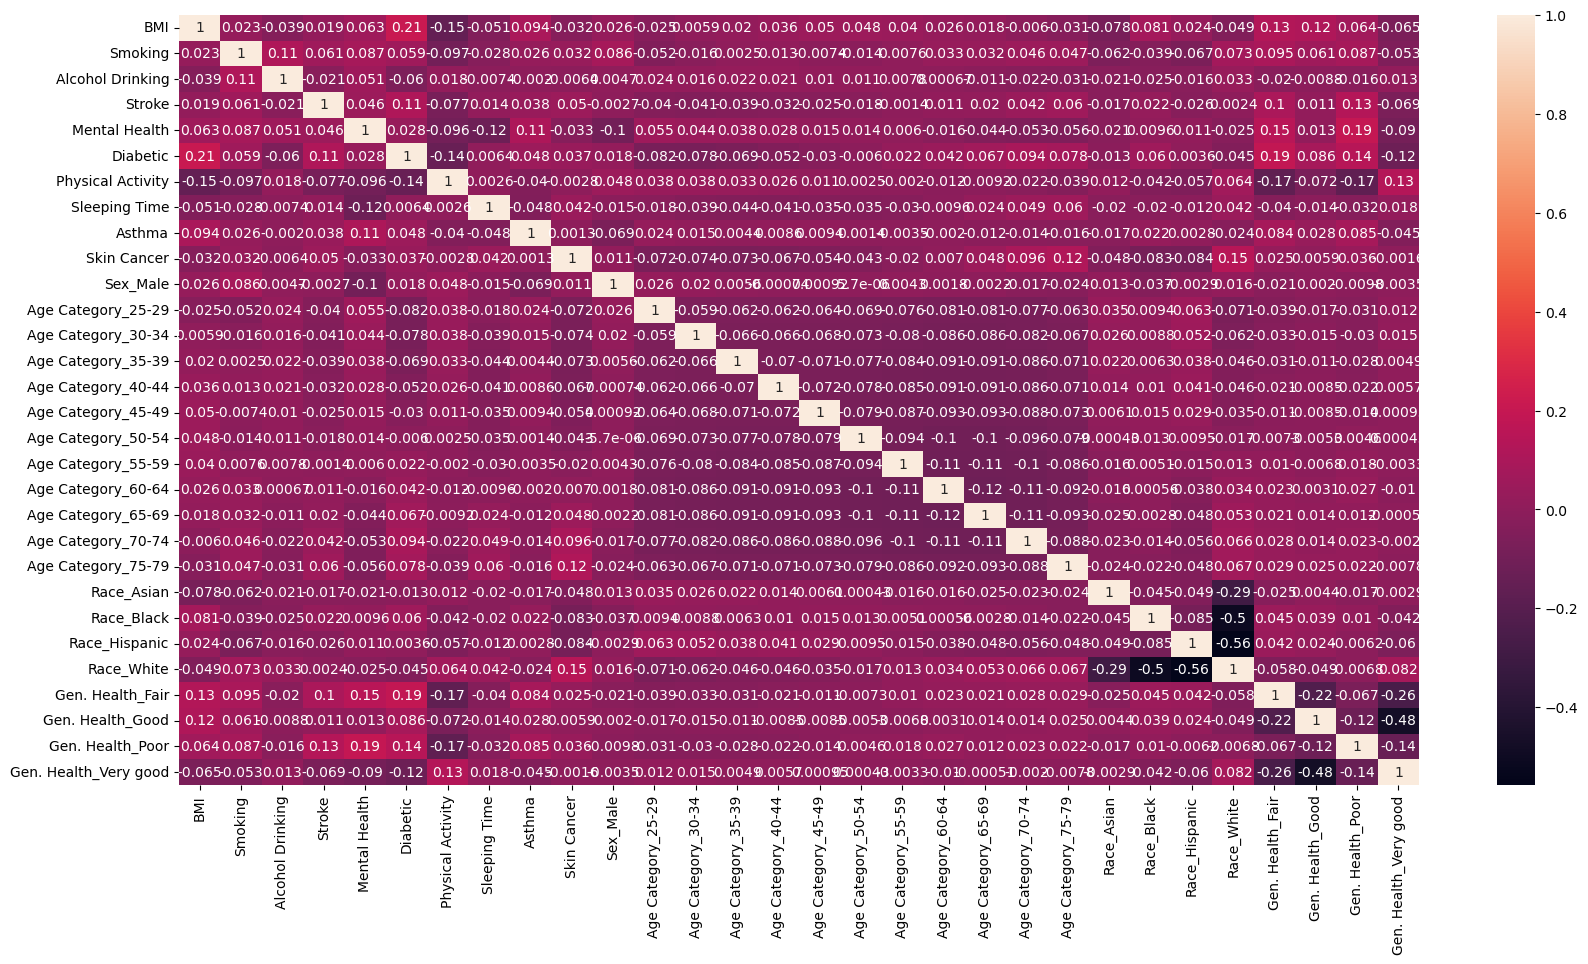

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
sns.heatmap(X_train_rfe.corr(),annot = True)
plt.show()

In [23]:
import statsmodels.api as sm  
from sklearn.impute import SimpleImputer

# Assuming X_train_rfe and y_train are your training data
# Handle missing or infinite values
X_train_rfe_constant = sm.add_constant(X_train_rfe)

# Check for NaN values
print("NaN values in X_train_rfe_constant:", X_train_rfe_constant.isnull().sum().sum())

# Check for infinite values
print("Infinite values in X_train_rfe_constant:", np.isinf(X_train_rfe_constant).sum().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_rfe_constant = pd.DataFrame(imputer.fit_transform(X_train_rfe_constant), columns=X_train_rfe_constant.columns)

# Check again for NaN values
print("NaN values in X_train_rfe_constant after imputation:", X_train_rfe_constant.isnull().sum().sum())

# Check again for infinite values
print("Infinite values in X_train_rfe_constant after imputation:", np.isinf(X_train_rfe_constant).sum().sum())

# Reset indices
X_train_rfe_constant.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Fit the GLM model
logm1 = sm.GLM(y_train, X_train_rfe_constant, family=sm.families.Binomial())
result = logm1.fit()

# Display the summary
result.summary()


NaN values in X_train_rfe_constant: 6546
Infinite values in X_train_rfe_constant: 0
NaN values in X_train_rfe_constant after imputation: 0
Infinite values in X_train_rfe_constant after imputation: 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Race_Other   No. Observations:               223856
Model:                            GLM   Df Residuals:                   223825
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6817.0
Date:                Fri, 10 Nov 2023   Deviance:                       13634.
Time:                        20:06:54   Pearson chi2:                 1.11e+04
No. Iterations:                    31   Pseudo R-squ. (CS):             0.2087
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -30.9589   1.46e+04     -0.002      0.998   -2.87e+04    2.86e+04
BMI                      -0.0666      0.020     -3.404      0.001      -0.105      -0.028
Smoking                  -0.1608      0.021     -7.557      0.000      -0.203      -0.119
Alcohol Drinking          0.0509      0.021      2.401      0.016       0.009       0.092
Stroke                   -0.0349      0.018     -1.948      0.051      -0.070       0.000
Mental Health             0.0413      0.019      2.161      0.031       0.004       0.079
Diabetic                 -0.0855      0.020     -4.252      0.000      -0.125      -0.046
Physical Activity         0.0655      0.021      3.172      0.002       0.025       0.106
Sleeping Time            -0.1091      0.018     -6.089      0.000      -0.144      -0.074
Asthma                    0.0740      0.019      3.858      0.000       0.036       0.112
Skin Cancer               0.1187      0.033      3.556      0.000       0.053       0.184
Sex_Male                  0.0606      0.021      2.886      0.004       0.019       0.102
Age Category_25-29       -0.0538      0.023     -2.389      0.017      -0.098      -0.010
Age Category_30-34       -0.0309      0.023     -1.346      0.178      -0.076       0.014
Age Category_35-39       -0.0788      0.024     -3.338      0.001      -0.125      -0.033
Age Category_40-44       -0.0556      0.024     -2.318      0.020      -0.103      -0.009
Age Category_45-49       -0.1027      0.024     -4.236      0.000      -0.150      -0.055
Age Category_50-54       -0.1219      0.025     -4.852      0.000      -0.171      -0.073
Age Category_55-59       -0.1438      0.026     -5.465      0.000      -0.195      -0.092
Age Category_60-64       -0.1115      0.028     -4.018      0.000      -0.166      -0.057
Age Category_65-69       -0.1394      0.029     -4.788      0.000      -0.196      -0.082
Age Category_70-74       -0.0776      0.030     -2.590      0.010      -0.136      -0.019
Age Category_75-79       -0.0775      0.030     -2.606      0.009      -0.136      -0.019
Race_Asian               -5.2708   1.48e+04     -0.000      1.000   -2.91e+04    2.91e+04
Race_Black               -8.6039   1.44e+04     -0.001      1.000   -2.83e+04    2.83e+04
Race_Hispanic            -9.3818   1.43e+04     -0.001      0.999   -2.81e+04    2.81e+04
Race_White              -14.1405   7243.391     -0.002      0.998   -1.42e+04    1.42e+04
Gen. Health_Fair         -0.1043      0.024     -4.276      0.000      -0.152      -0.056
Gen. Health_Good         -0.1215      0.029     -4.238      0.000      -0.178      -0.065
Gen. Health_Poor         -0.0720      0.020     -3.577      0.000      -0.112      -0.033
Gen. Health_Very good    -0.0291      0.030     -0.959      0.337      -0.089       0.030
=======================

In [24]:
X_train_rfe = X_train_rfe.drop(['Age Category_35-39'], axis=1)
X_train_rfe.columns

Index(['BMI', 'Smoking', 'Alcohol Drinking', 'Stroke', 'Mental Health',
       'Diabetic', 'Physical Activity', 'Sleeping Time', 'Asthma',
       'Skin Cancer', 'Sex_Male', 'Age Category_25-29', 'Age Category_30-34',
       'Age Category_40-44', 'Age Category_45-49', 'Age Category_50-54',
       'Age Category_55-59', 'Age Category_60-64', 'Age Category_65-69',
       'Age Category_70-74', 'Age Category_75-79', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_White', 'Gen. Health_Fair', 'Gen. Health_Good',
       'Gen. Health_Poor', 'Gen. Health_Very good'],
      dtype='object')

In [26]:
# build a linear model using statsmodel

import statsmodels.api as sm  
from sklearn.impute import SimpleImputer

# Assuming X_train_rfe and y_train are your training data
# Handle missing or infinite values
X_train_rfe_constant = sm.add_constant(X_train_rfe)

# Check for NaN values
print("NaN values in X_train_rfe:", X_train_rfe.isnull().sum().sum())

# Check for infinite values
print("Infinite values in X_train_rfe:", np.isinf(X_train_rfe).sum().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_rfe = pd.DataFrame(imputer.fit_transform(X_train_rfe), columns=X_train_rfe.columns)

# Check again for NaN values
print("NaN values in X_train_rfe after imputation:", X_train_rfe.isnull().sum().sum())

# Check again for infinite values
print("Infinite values in X_train_rfe after imputation:", np.isinf(X_train_rfe).sum().sum())

# Reset indices
X_train_rfe_constant.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)


 
logm1 = sm.GLM(list(y_train),(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

NaN values in X_train_rfe: 6546
Infinite values in X_train_rfe: 0
NaN values in X_train_rfe after imputation: 0
Infinite values in X_train_rfe after imputation: 0


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               223856
Model:                            GLM   Df Residuals:                   223826
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6822.6
Date:                Fri, 10 Nov 2023   Deviance:                       13645.
Time:                        20:17:24   Pearson chi2:                 1.11e+04
No. Iterations:                    31   Pseudo R-squ. (CS):             0.2087
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -30.9570   1.46e+04     -0.002      0.998   -2.87e+04    2.86e+04
BMI                      -0.0749      0.019     -3.860      0.000      -0.113      -0.037
Smoking                  -0.1696      0.021     -8.029      0.000      -0.211      -0.128
Alcohol Drinking          0.0487      0.021      2.298      0.022       0.007       0.090
Stroke                   -0.0332      0.018     -1.855      0.064      -0.068       0.002
Mental Health             0.0402      0.019      2.108      0.035       0.003       0.078
Diabetic                 -0.0841      0.020     -4.185      0.000      -0.124      -0.045
Physical Activity         0.0619      0.021      3.004      0.003       0.022       0.102
Sleeping Time            -0.1046      0.018     -5.864      0.000      -0.140      -0.070
Asthma                    0.0736      0.019      3.842      0.000       0.036       0.111
Skin Cancer               0.1254      0.033      3.765      0.000       0.060       0.191
Sex_Male                  0.0619      0.021      2.950      0.003       0.021       0.103
Age Category_25-29       -0.0240      0.021     -1.170      0.242      -0.064       0.016
Age Category_30-34        0.0010      0.021      0.049      0.961      -0.040       0.042
Age Category_40-44       -0.0218      0.022     -1.012      0.312      -0.064       0.020
Age Category_45-49       -0.0687      0.022     -3.146      0.002      -0.111      -0.026
Age Category_50-54       -0.0857      0.022     -3.814      0.000      -0.130      -0.042
Age Category_55-59       -0.1053      0.023     -4.494      0.000      -0.151      -0.059
Age Category_60-64       -0.0711      0.025     -2.874      0.004      -0.120      -0.023
Age Category_65-69       -0.0992      0.026     -3.774      0.000      -0.151      -0.048
Age Category_70-74       -0.0396      0.028     -1.440      0.150      -0.094       0.014
Age Category_75-79       -0.0461      0.028     -1.642      0.101      -0.101       0.009
Race_Asian               -5.2708   1.49e+04     -0.000      1.000   -2.91e+04    2.91e+04
Race_Black               -8.6034   1.44e+04     -0.001      1.000   -2.83e+04    2.83e+04
Race_Hispanic            -9.3813   1.44e+04     -0.001      0.999   -2.81e+04    2.81e+04
Race_White              -14.1384   7244.928     -0.002      0.998   -1.42e+04    1.42e+04
Gen. Health_Fair         -0.1019      0.024     -4.181      0.000      -0.150      -0.054
Gen. Health_Good         -0.1183      0.029     -4.133      0.000      -0.174      -0.062
Gen. Health_Poor         -0.0698      0.020     -3.469      0.001      -0.109      -0.030
Gen. Health_Very good    -0.0257      0.030     -0.849      0.396      -0.085       0.034
=========================================================================================
"""

In [27]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,Race_White,3.87
23,Race_Hispanic,2.52
22,Race_Black,2.28
26,Gen. Health_Good,1.87
28,Gen. Health_Very good,1.78
25,Gen. Health_Fair,1.62
21,Race_Asian,1.49
18,Age Category_65-69,1.39
17,Age Category_60-64,1.38
19,Age Category_70-74,1.37
